In [41]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import lightgbm as lgbm
import xgboost as xgb
# For visualization
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
RAND = 10

Дан датасет людей, которые находились на борту Титаника.

**Описание:**

- Survived -  выжил/не выжил
- pclass - класс билета (первый, второй, третий)
- sex - пол
- Age - возраст в годах
- sibsp	- братя и сестеры / супруги на борту "Титаника" (кол-во)
- parch	- родителей / детей на борту "Титаника" (кол-во)
- ticket - номер билета
- fare - Стоимость проезда (доллары)
- cabin	- номер кабины
- embarked - порт посадки C = Шербур, Q = Квинстаун, S = Саутгемптон

Необходимо построить модель классификации, которая бы предсказывала выживет человек или нет (Survived)

# Загрузка и первичный анализ данных

1) Прочитать файл train.csv и записать в переменную df

In [42]:
df = pd.read_csv('train.csv')

2) В датасете мы имеем признаки с уникальным ID пассажира и номерами билета, их необходимо исключить

In [44]:
dfunique = df.drop_duplicates()

# EDA анализ

4) Вывести общую информацию о датасете при помощи метода info(), а также основные описательные статистики для числовых и категориальных признаков

Какой средний возраст пассажиров? Откуда большая часть людей садилась в лайнер (порт)?

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


5) Постройте график соотношения кол-ва выживших и тех кто не выжил - Survived в %, обязательно над графиками указать проценты (пример в ноутбуке EDA). Есть ли дисбаланс классов?

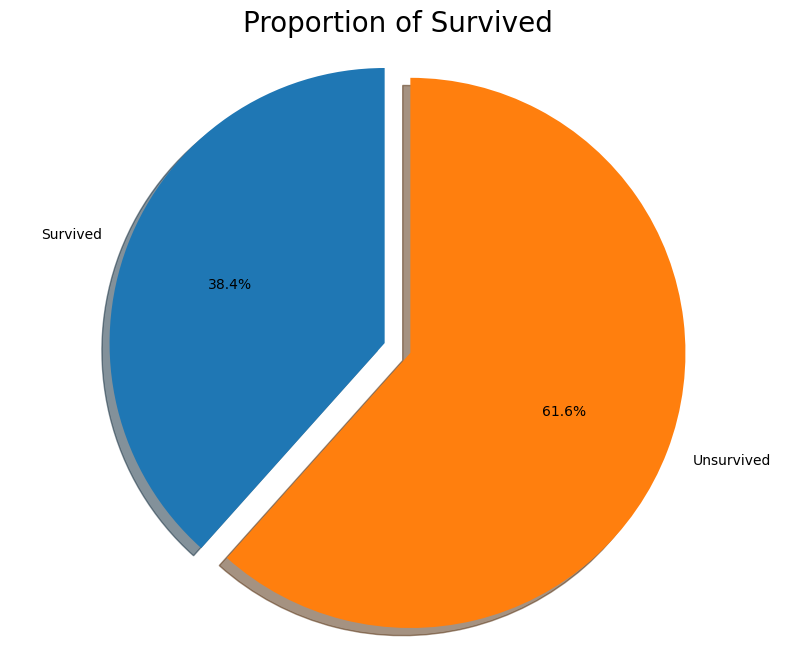

In [40]:
labels = 'Survived', 'Unsurvived'
sizes = [df.Survived[df['Survived']==1].count(), df.Survived[df['Survived']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Survived", size = 20)
plt.show()

## Pclass

6) Отобразите на графике долю пассажиров в % (ось OY), которые выжили/не выжили Survived (ось OX) в каждом из классов Pclass (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из **значений в Pclass**, **пример был в ноутбке-лекции по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

Например, выживших всего 100 человек. Из них жило в первом классе Pcalss_1 = 20, во втором классе Pcalss_2 = 80. Тогда выживших в первом классе Pcalss_1 - 20/100 = 20%, выживших во втором классе Pcalss_2 80 / 100 = 80%

**Какие выводы вы можете сделать? напишите кратко**

## Age

7) Отобразите график **распределения возраста Age (seaborn.displot) в разрезе Survived**. Не забывайте про common_norm=False. 

**Какие выводы вы можете сделать? напишите кратко**

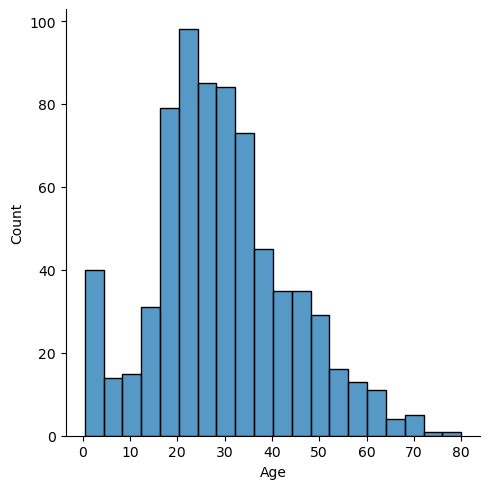

In [24]:
sns.displot(df['Age'], common_norm=False)

8) Изучите признаки **Survived, Age и Sex** при помощи sns.violinplot. Какие интересные особенности можно отметить?

По оси OX - Sex, по OY - Age, hue-Survived

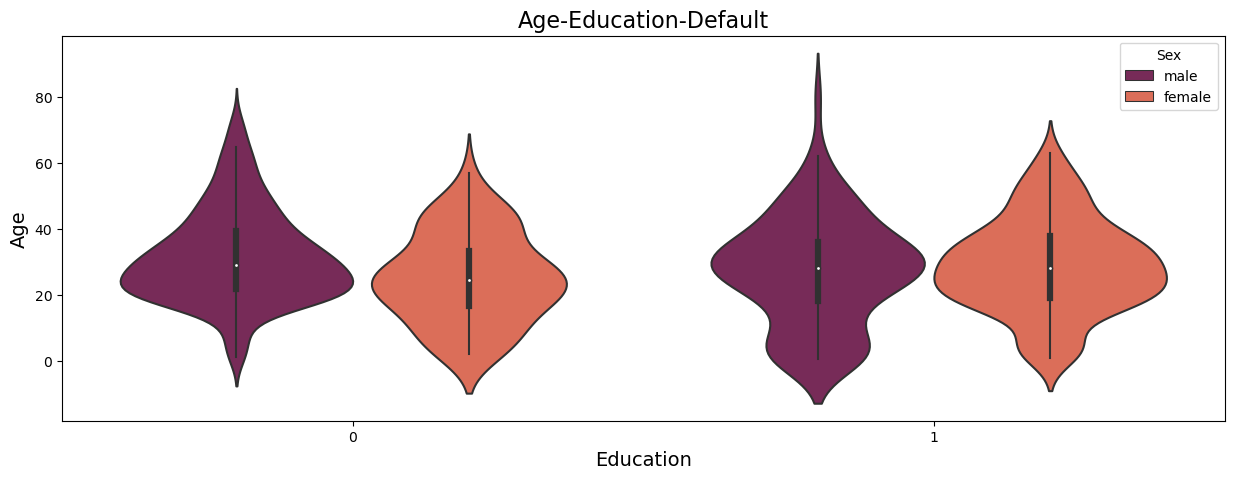

In [49]:
plt.figure(figsize=(15, 5))

sns.violinplot(x='Survived', y='Age', hue='Sex', data=df, palette='rocket')

plt.title('Age-Education-Default', fontsize=16)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)
plt.show()

9) Заполните пропуски в признаке возраст Age значением -99.

**По какой причине мы берем такое значение, если хотим использовать модель дерева решений?**

In [51]:
df['Age'].fillna(-99)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Embarked

10) Заполните пропуски в признаке Embarked при помощи группировки по Pclass модой (**было похожее задание в ДЗ по многоклассовой классификации**).

11) Отобразите на графике долю пассажиров в % (ось OY), которые выжили/не выжили Survived (ось OX) в зависимости от того, в каком порту они садились в Титаник Embarked (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из **значений в Embarked**, **пример был в ноутбке-лекции по EDA анализу** (также похожие действия делали в 6 задании)

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

**Какие выводы вы можете сделать? напишите кратко**

## Fare

12) Отобразите график **распределения цены билета Fare (seaborn.displot) в разрезе Survived**. Не забывайте про common_norm=False. 

**Какие выводы вы можете сделать? напишите кратко**

13) Проанализируйте признаки **Survived, Fare и Sex** при помощи sns.boxplot. Какие интересные особенности можно отметить? 

По оси OX - Sex, по OY - Fare, hue - Survived

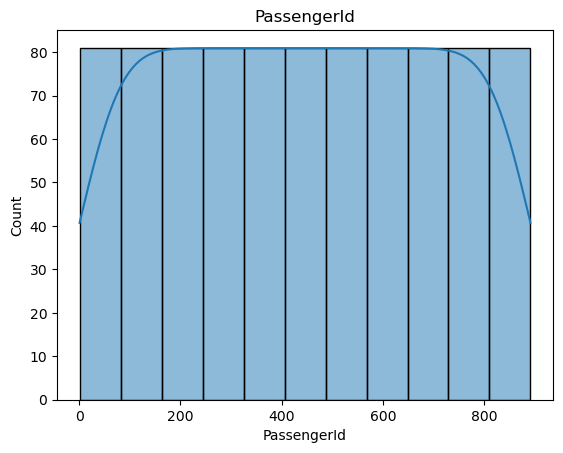

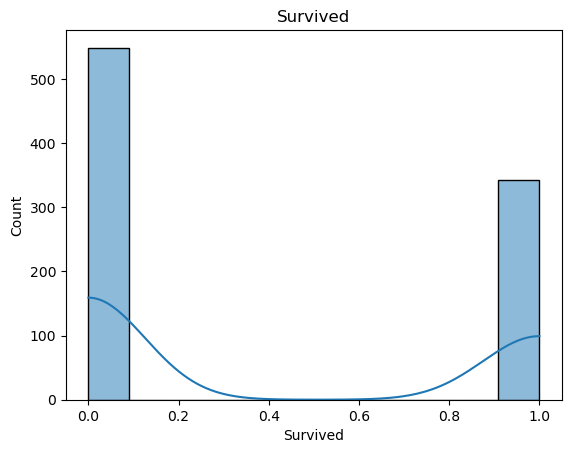

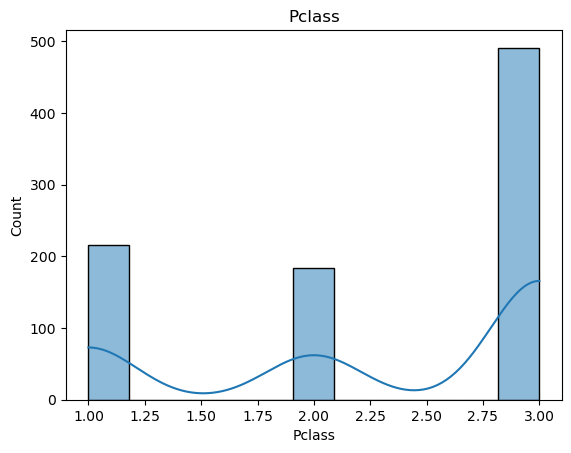

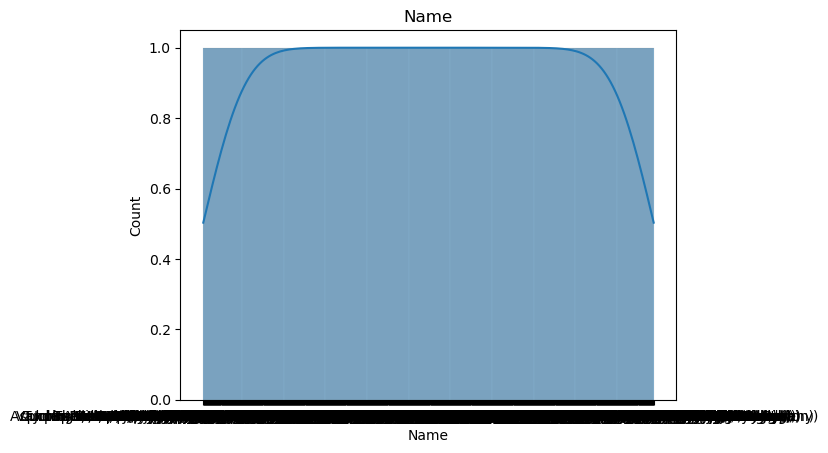

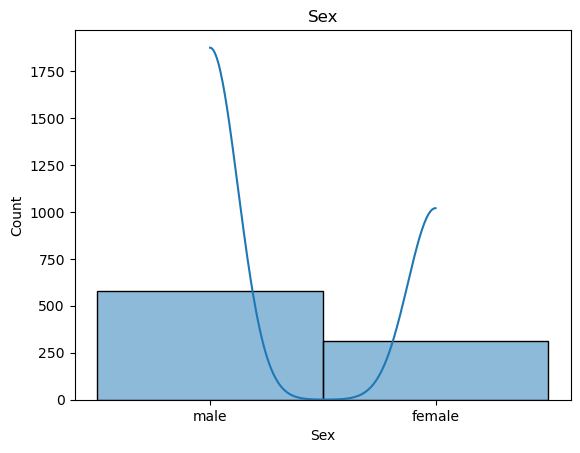

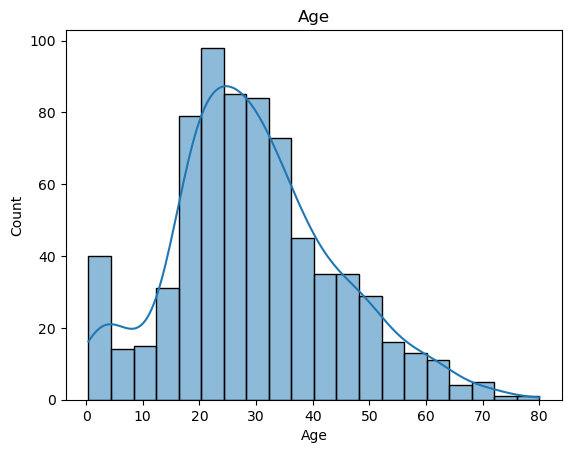

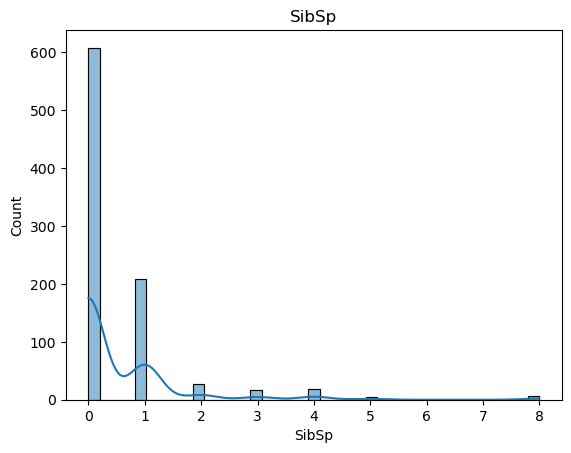

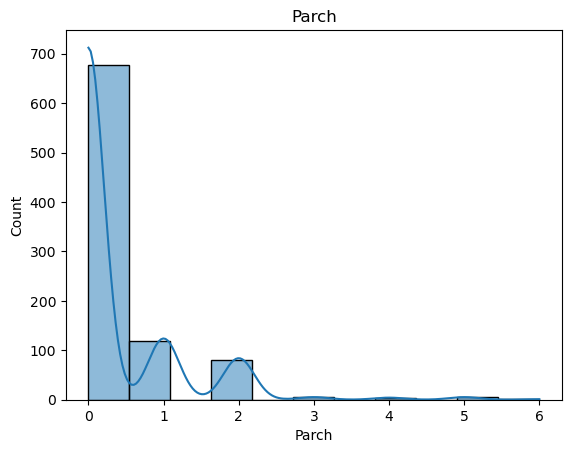

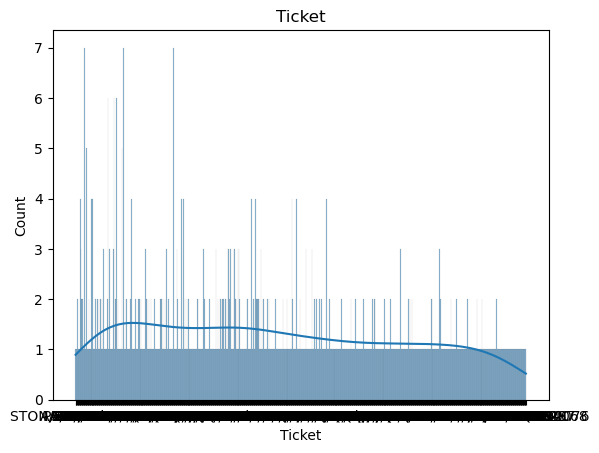

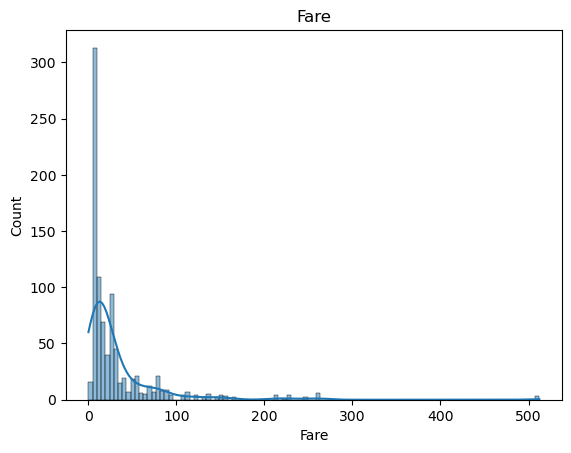

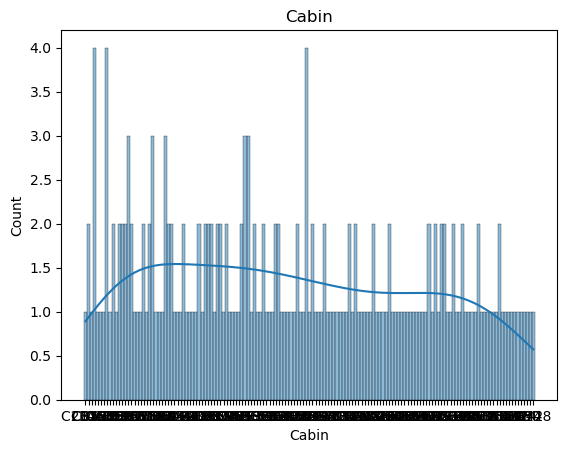

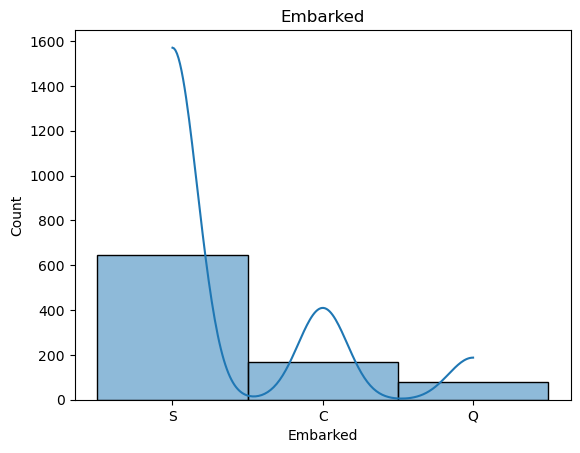

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure()  # Create a new figure for each column
    sns.histplot(df[column], kde=True)
    plt.title(column)  # Set the column name as the plot title
    plt.show()  # Display the plot

# Feature engineering

14) Генерация признаков

- Посмотрите подробнее на значения признака **Name**
- Создайте новый признак Title при помощи приведенного ниже регулярного выражения, которое выбирает только слова с точкой (код уже дан, просто запустить)
- Далее посчитайте самостоятельно **кол-во каждого уникального значения в Title**

Регулярное выражение `'(\w+\.)'`

In [60]:
df['Title'] = df.Name.str.extract('(\w+\.)', expand=False)
df['Title'] = df.Title.apply(lambda x: x.split('.')[0])

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


15) Произведите замену в признаке Title **на значение 'Rare'** следующие значения: 

```python
'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Col','Major', 'Mlle', 'Rev', 'Dr'
```

In [78]:
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

16) Добавьте признак **FamilySize**, который говорит о кол-ве человек в семье на борту с учетом самого пассажира, используйте 

```python
SibSp + Parch + 1
```

17) Добавьте признак **IsAlone**, который означает, что у человека нет родственников на борту.
Если человек без родственников, то IsAlone=1, иначе IsAlone=0

18) Удалите лишние колонки:

- Name - так как много уникальных значений
- Cabin - так как плохо заполнено и часть из заполненных - уникальные значения

19) Убедитесь, что пропусков в датасете нет. Если они есть, то какой то пункт пропустили

20) Преобразуйте категориальные данные в бинарные при помощи pd.get_dummies(), числовые должны быть в том же видите. Запишите результат в новую переменную **df_label**. Для деревьев параметр drop_first НЕ НУЖЕН

# Baseline DecisionTreeClassifier

21) Разделите выборку на train и test данные. Используйте стратификацию stratify, test_size=0.2, а также фиксацию random_state

22) Обучите **БЕЙЗЛАЙН DecisionTreeClassifier**. При обучении обязательно зафиксируйте random_state

23) Какие результаты по основным метрикам вы получили на test? Что можно сказать про модель?

Запишите результат в **переменную metrics**, используя функцию как в лекции

Может ли она разделять классы?

24) Проверьте на тренировочных данных, не переобучилась ли модель? 

# Gridsearch

25) Найдите параметры для DecisionTreeClassifier, используя StratifiedKFold с 3 фолдами, при помощи **GridSearchCV**

- Метрика для поиска параметров scoring = 'roc_auc'
- Не забывайте везде фиксировать random_state

Гиперпараметры:
- criterion {“gini”, “entropy”}, default=”gini”
- splitter {“best”, “random”}, default=”best” - стратегия разбиения на каждом листе
- max_depth - максимальная глубина дерева
- min_samples_split - минимальное количество выборок, необходимое для разделения во внутреннем узле (default=2)
- min_samples_leaf - минимальное количество образцов, необходимое для нахождения в листе (конечном листе) (default=1)
- class_weight - учитывание влияния класса (дисбаланс)
- max_features - максимальное кол-во признаков, которые следует учитывать при поиске наилучшего разбиения

26) Выведите лучшее значение метрики best_score_ и лучшие параметры best_estimator_ после обучения GridSearchCV

27) Обучите модель DecisionTreeClassifier на лучших параметрах

28) Какие результаты по основным метрикам вы получили на test? Добавьте результат в переменную metrics

Есть ли улучшения по сравнению с baseline? 

**Если вы получили ROC-AUC меньше 0.87 на тесте, то нужно тщательнее подобрать параметры для RandomizedSearchCV**

29) Проверьте на тренировочных, не переобучилась ли новая модель?

## Permutation Importance

30) Какие **признаки** больше всего повлияли на то, что человек выживет/не выживет на борту Титаника?

Используйте permutation importance (пример в лекции по деревьям решений)